# Scales and Transformations

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading data
df = pd.read_csv("data/pokemon.csv")
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### Scale the x-axis to log-type

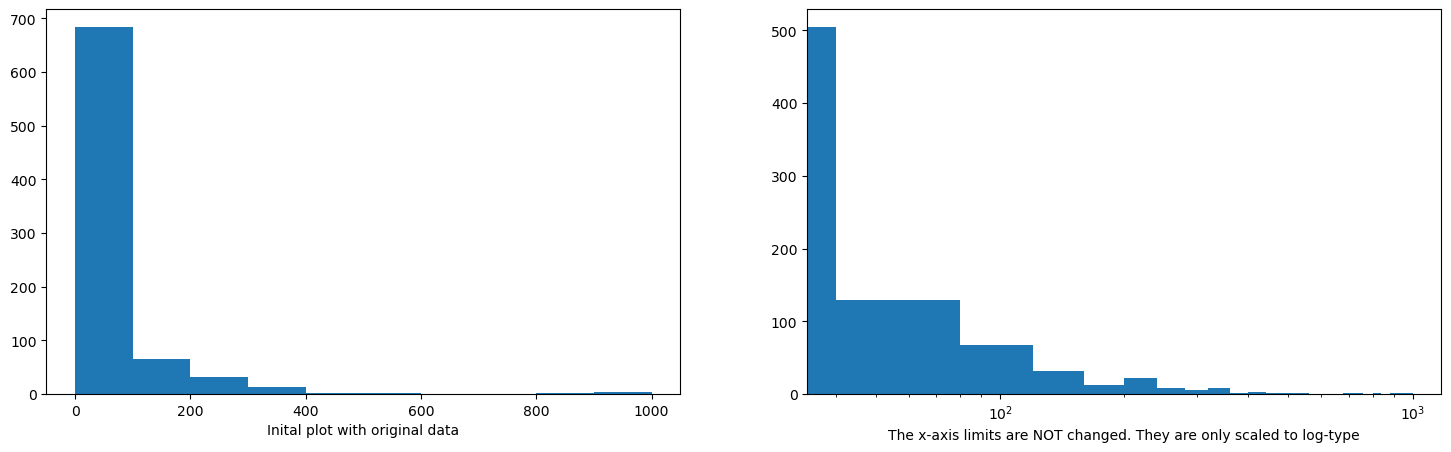

In [3]:
plt.figure(figsize=[18, 5])

plt.subplot(1, 2, 1)
plt.hist(data=df, x='weight')
plt.xlabel("Inital plot with original data")

plt.subplot(1, 2, 2)
bins = np.arange(0, df['weight'].max()+40, 40)
plt.hist(data=df, x='weight', bins=bins)
plt.xscale('log')
plt.xlabel("The x-axis limits are NOT changed. They are only scaled to log-type");

In [4]:
# Describe the data
df['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

### Scale the x-axis to log-type, and change the axis limit

In [5]:
np.log10(df['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

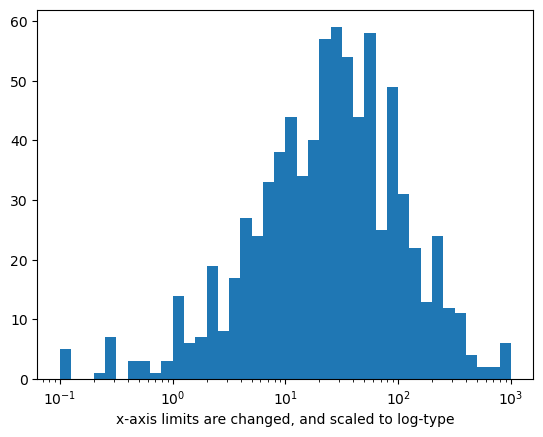

In [6]:
## Axis transformation
# bin sizes
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=df, x='weight', bins=bins)
plt.xscale('log')

# Apply x-axis label
plt.xlabel("x-axis limits are changed, and scaled to log-type");

### Scale the x-axis to log-type, change the axis limits, and increase the x-ticks

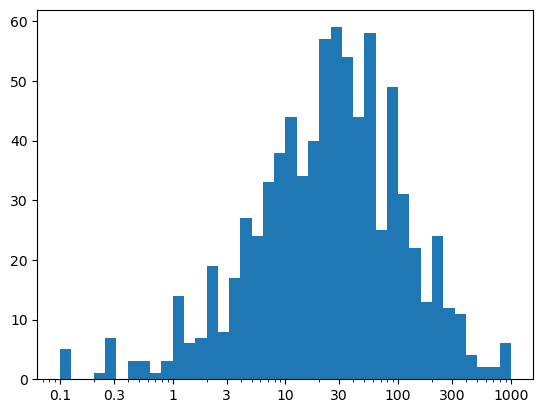

In [7]:
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye along the x-axis
labels = [f'{v}' for v in ticks]

# Plot the histogram
plt.hist(data=df, x='weight', bins=bins)
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels);

### Custom scaling the given data Series, instead of using the built-in log scale

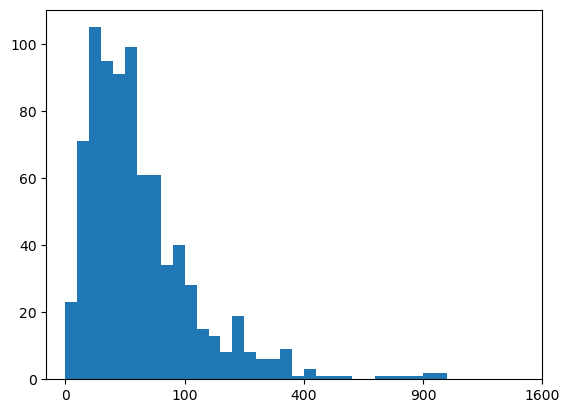

In [8]:
def sqrt_trans(x, inverse=False):
    """transformation helper function"""
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(df['weight'].max())+1, 1)

# Plot the scaled data
plt.hist(df['weight'].apply(sqrt_trans), bins=bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(df['weight'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse=True).astype(int));

Histogram based on the custom scaling the given data Series.